In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime


In [2]:
dataset = pd.read_csv('MissingMigrants-Global-2019-03-29T18-36-07.csv')

In [3]:
dataset.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,"March 28, 2019",2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,"March 25, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


In [9]:
def missingData(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    md = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    md = md[md["Percent"] > 0]
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (8, 4))
    plt.xticks(rotation='90')
    sns.barplot(md.index, md["Percent"],color="g",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return md

def valueCounts(dataset, features):
    """Display the features value counts """
    for feature in features:
        vc = dataset[feature].value_counts()
        print(vc)
        print('-'*30)

,Total,Percent
Minimum Estimated Number of Missing,4830,90.568161
Number of Children,4689,87.924245
Number of Survivors,4584,85.955372
Number of Females,4436,83.180199
Migration Route,2673,50.121883
Number of Males,2520,47.252953
URL,2141,40.146259
Number Dead,191,3.581474
UNSD Geographical Grouping,11,0.206263
Location Description,10,0.187512


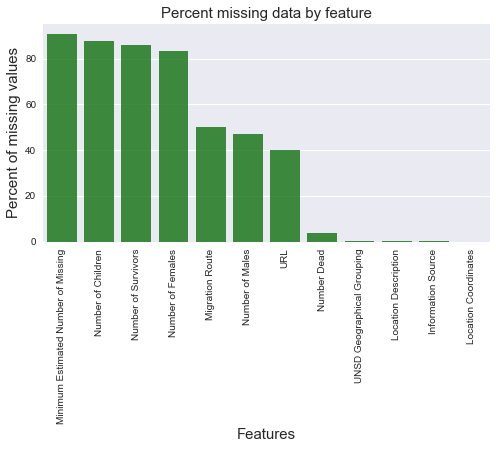

In [10]:
missingData(dataset)

In [11]:
f = ['Region of Incident', 'Migration Route']
valueCounts(dataset,f)

US-Mexico Border      1337
North Africa          1239
Mediterranean          984
Sub-Saharan Africa     475
Central America        309
Europe                 249
Horn of Africa         235
Middle East            164
South Asia             151
Southeast Asia          96
Caribbean               59
South America           28
East Asia                5
North America            1
Central Asia             1
Name: Region of Incident, dtype: int64
------------------------------
Central America to US                        1507
Central Mediterranean                         499
Western Mediterranean                         255
Eastern Mediterranean                         230
Western Balkans                                64
Calais to United Kingdom                       51
Western African                                15
Horn Africa to Yemen                           15
Italy to France                                 9
Darien Gap                                      7
Caribbean to Central Amer

In [12]:
data_copy = dataset.copy()

In [19]:
def convert_date(d):
    new_d = datetime.datetime.strptime(d,'%B %d, %Y')
    return new_d


In [20]:
data_copy['Date'] = data_copy['Reported Date'].apply(convert_date)

In [21]:
data_copy['Lat'], data_copy['Lon'] = data_copy['Location Coordinates'].str.split(', ').str

In [23]:
data_copy.Lat = data_copy.Lat.astype(float)
data_copy.Lon = data_copy.Lon.astype(float)

In [25]:
data_copy['Number Dead'].fillna(0, inplace = True)
data_copy['Minimum Estimated Number of Missing'].fillna(0,inplace = True)

In [26]:
data_copy['Total Dead and Missing'] = data_copy['Total Dead and Missing'].astype(float)

In [27]:
toDrop = [
    'Reported Date',
    'Web ID',
    'Number of Children',
    'Number of Survivors',
    'Number of Females',
    'Number of Males',
    'Location Coordinates',
    'URL',
    'UNSD Geographical Grouping'
]

In [28]:
data_copy.drop(toDrop, axis=1, inplace=True)

In [29]:
data_copy.shape

(5333, 14)

In [30]:
data_copy.head(3)

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Cause of Death,Location Description,Information Source,Migration Route,Source Quality,Date,Lat,Lon
0,Mediterranean,2019,Mar,0.0,2.0,2.0,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,Eastern Mediterranean,5,2019-03-28,38.362369,26.172509
1,Mediterranean,2019,Mar,4.0,0.0,4.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,Eastern Mediterranean,5,2019-03-26,39.441976,26.378816
2,Mediterranean,2019,Mar,1.0,0.0,1.0,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta",Western Mediterranean,3,2019-03-26,35.871902,-5.343038


In [31]:
def deathCauseReplacement(data):
    #HEALTH CONDITION
    data.loc[data['Cause of Death'].str.contains('Sickness|sickness'), 'Cause of Death'] = 'Health Condition'
    data.loc[data['Cause of Death'].str.contains('diabetic|heart attack|meningitis|virus|cancer|bleeding|insuline|inhalation'), 'Cause of Death'] = 'Health Condition'
    data.loc[data['Cause of Death'].str.contains('Organ|Coronary|Envenomation|Post-partum|Respiratory|Hypoglycemia'), 'Cause of Death'] = 'Health Condition'
    #HARSH CONDITIONS
    data.loc[data['Cause of Death'].str.contains('harsh weather|Harsh weather'), 'Cause of Death'] = 'Harsh conditions'
    data.loc[data['Cause of Death'].str.contains('Harsh conditions|harsh conditions'), 'Cause of Death'] = 'Harsh conditions'
    data.loc[data['Cause of Death'].str.contains('Exhaustion|Heat stroke'), 'Cause of Death'] = 'Harsh conditions'
    #UNKNOWN
    data.loc[data['Cause of Death'].str.contains('Unknown|unknown'), 'Cause of Death'] = 'Unknown'
    #STARVATION
    data.loc[data['Cause of Death'].str.contains('Starvation|starvation'), 'Cause of Death'] = 'Starvation'
    #DEHYDRATION
    data.loc[data['Cause of Death'].str.contains('dehydration|Dehydration'), 'Cause of Death'] = 'Dehydration'
    #DROWNING
    data.loc[data['Cause of Death'].str.contains('Drowning|drowning|Pulmonary|respiratory|lung|bronchial|pneumonia|Pneumonia'), 'Cause of Death'] = 'Drowning'
    #HYPERTHERMIA
    data.loc[data['Cause of Death'].str.contains('hyperthermia|Hyperthermia'), 'Cause of Death'] = 'Hyperthermia'
    #HYPOTHERMIA
    data.loc[data['Cause of Death'].str.contains('hypothermia|Hypothermia'), 'Cause of Death'] = 'Hypothermia'
    #ASPHYXIATION
    data.loc[data['Cause of Death'].str.contains('asphyxiation|suffocation'), 'Cause of Death'] = 'Asphyxiation'
    #VEHICLE ACCIDENT
    data.loc[data['Cause of Death'].str.contains('train|bus|vehicle|truck|boat|car|road|van|plane'), 'Cause of Death'] = 'Vehicle Accident'
    data.loc[data['Cause of Death'].str.contains('Train|Bus|Vehicle|Truck|Boat|Car|Road|Van|Plane'), 'Cause of Death'] = 'Vehicle Accident'
    #MURDER
    data.loc[data['Cause of Death'].str.contains('murder|stab|shot|violent|blunt force|violence|beat-up|fight|murdered|death'), 'Cause of Death'] = 'Murder'
    data.loc[data['Cause of Death'].str.contains('Murder|Stab|Shot|Violent|Blunt force|Violence|Beat-up|Fight|Murdered|Death'), 'Cause of Death'] = 'Murder'
    data.loc[data['Cause of Death'].str.contains('Hanging|Apache|mortar|landmine|Rape|Gassed'), 'Cause of Death'] = 'Murder'
    #CRUSHED
    data.loc[data['Cause of Death'].str.contains('crushed to death|crush|Crush|Rockslide'), 'Cause of Death'] = 'Crushed'
    #BURNED
    data.loc[data['Cause of Death'].str.contains('burn|burns|burned|fire'), 'Cause of Death'] = 'Burned'
    data.loc[data['Cause of Death'].str.contains('Burn|Burns|Burned|Fire'), 'Cause of Death'] = 'Burned'
    #ELECTROCUTION
    data.loc[data['Cause of Death'].str.contains('electrocution|Electrocution'), 'Cause of Death'] = 'Electrocution' #folgorazione
    #FALLEN
    data.loc[data['Cause of Death'].str.contains('Fall|fall'), 'Cause of Death'] = 'Fallen' 
    #KILLED BY ANIMALS
    data.loc[data['Cause of Death'].str.contains('crocodile|hippopotamus|hippoptamus'), 'Cause of Death'] = 'Killed by animals'
    #EXPOSURE
    data.loc[data['Cause of Death'].str.contains('exposure|Exposure'), 'Cause of Death'] = 'Exposure'

In [32]:
deathCauseReplacement(data_copy)

In [33]:
valueCounts(data_copy,['Cause of Death'])

Drowning             1331
Unknown              1054
Health Condition      938
Vehicle Accident      784
Murder                387
Starvation            215
Harsh conditions      147
Dehydration           145
Hyperthermia          113
Hypothermia            82
Suffocation            36
Mixed                  27
Exposure               22
Asphyxiation           14
Electrocution          12
Fallen                  8
Burned                  8
Crushed                 4
Killed by animals       3
Suicide                 3
Name: Cause of Death, dtype: int64
------------------------------


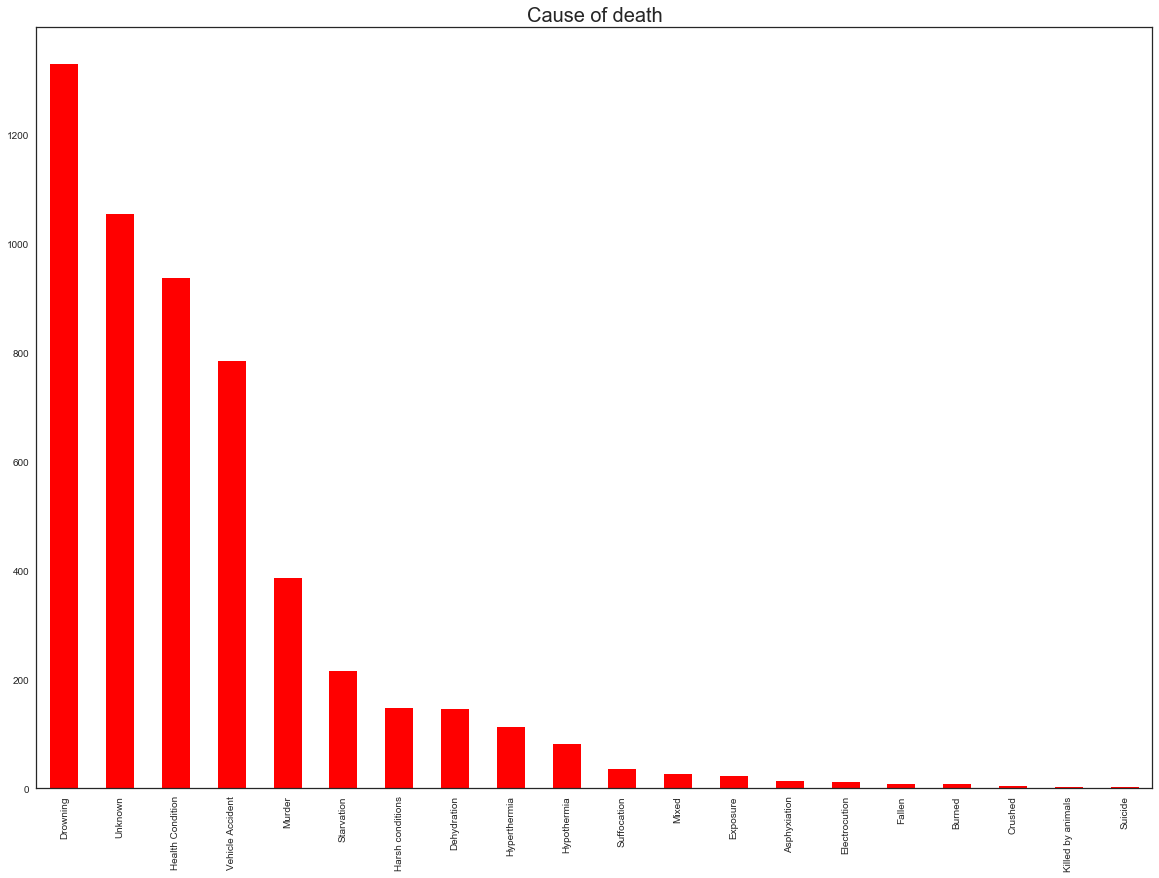

In [35]:
fig = plt.figure(figsize=(20,14))
sns.set(style='white')
data_copy['Cause of Death'].value_counts().plot(kind = 'bar', color = 'r', align = 'center')
plt.title('Cause of death', fontsize=20)
plt.show()


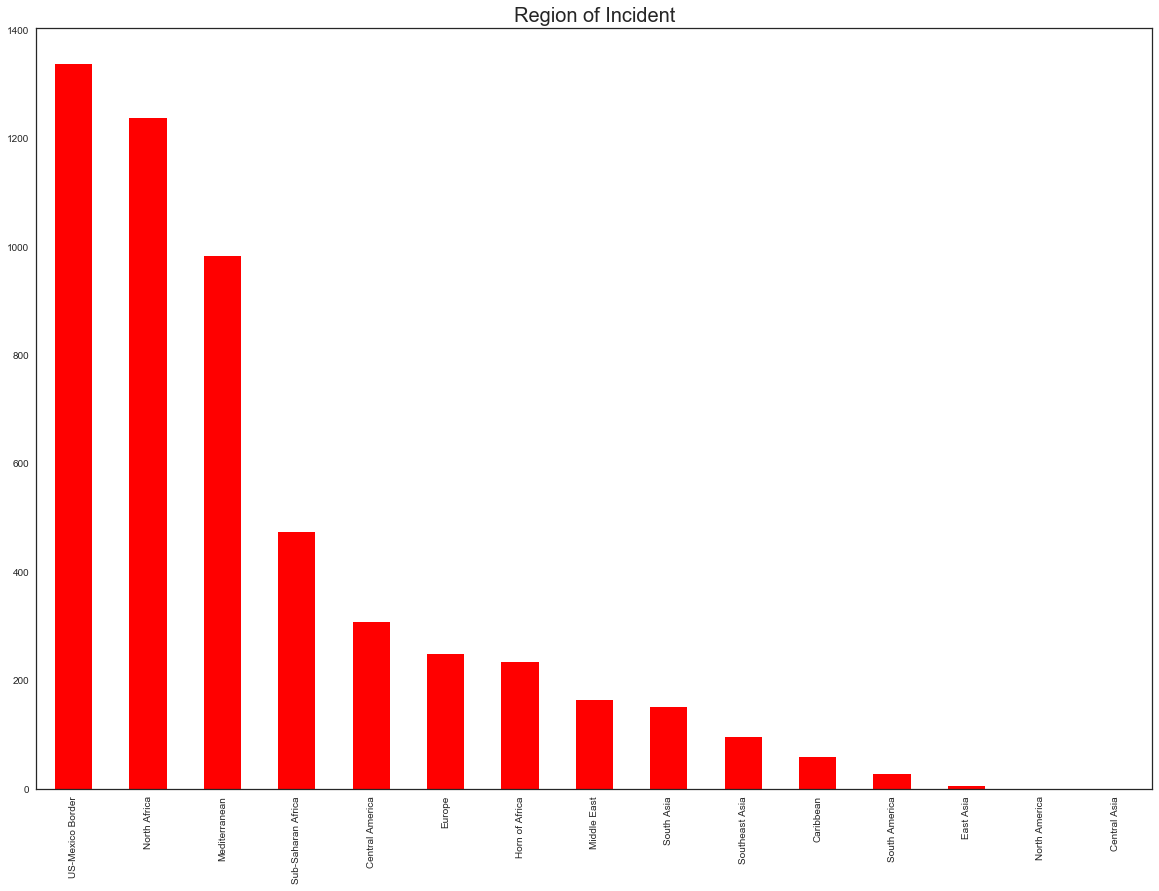

In [36]:
fig = plt.figure(figsize=(20,14))
sns.set(style = 'white')
data_copy['Region of Incident'].value_counts().plot(kind = 'bar', color = 'r',align = 'center')
plt.title('Region of Incident', fontsize =20)
plt.show()

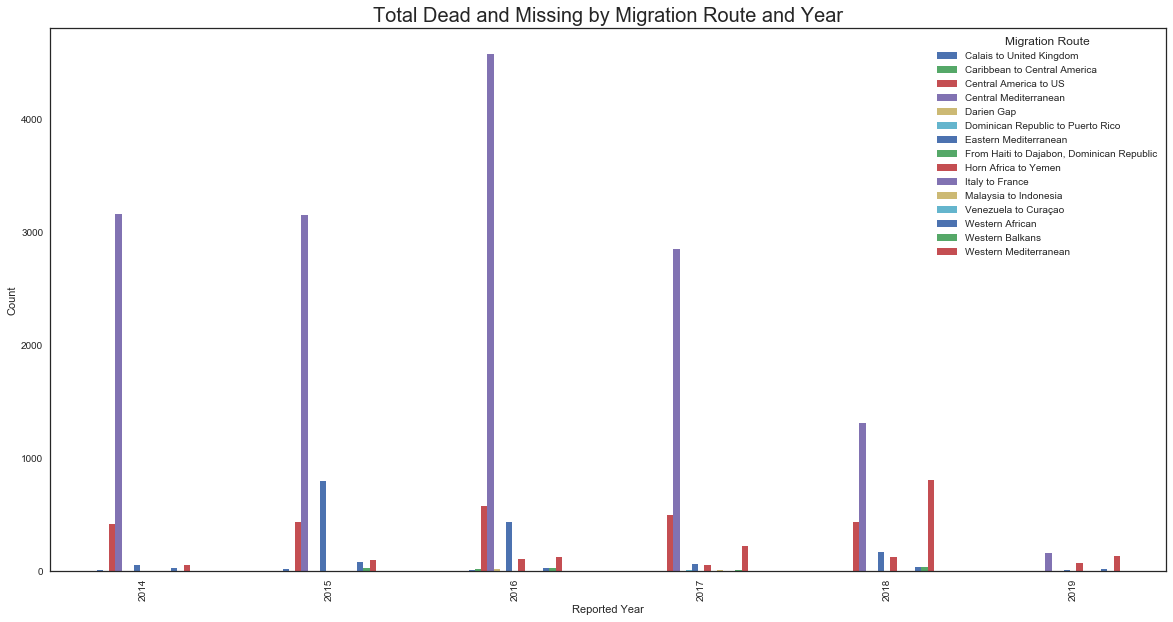

In [38]:
data_copy.pivot_table('Total Dead and Missing', index='Reported Year', 
                               columns='Migration Route', aggfunc='sum').plot(figsize=(20, 10), kind='bar')
plt.ylabel('Count')
plt.title('Total Dead and Missing by Migration Route and Year', fontsize=20)
plt.show()

In [39]:
data_copy.head()

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Cause of Death,Location Description,Information Source,Migration Route,Source Quality,Date,Lat,Lon
0,Mediterranean,2019,Mar,0.0,2.0,2.0,Drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,Eastern Mediterranean,5,2019-03-28,38.362369,26.172509
1,Mediterranean,2019,Mar,4.0,0.0,4.0,Drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,Eastern Mediterranean,5,2019-03-26,39.441976,26.378816
2,Mediterranean,2019,Mar,1.0,0.0,1.0,Drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta",Western Mediterranean,3,2019-03-26,35.871902,-5.343038
3,Mediterranean,2019,Mar,1.0,0.0,1.0,Drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,Western Mediterranean,1,2019-03-26,35.635116,-5.275650
4,Central America,2019,Mar,1.0,0.0,1.0,Vehicle Accident,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste",NaN,3,2019-03-25,19.334475,-98.069824
